# Tasks To Do:

## Exercises:

## Problem-1

<font color='Blue'>1.	Data Exploration and Understanding:</font>

### Dataset Overview

### Connecting to drive

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Importing Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### 1.	Loading the dataset and displaying the first 10 rows.

In [4]:

dataset = pd.read_csv("/content/drive/MyDrive/5CS037/Datasets/WHR.csv")


print("Dataset Overview:")
print(dataset.head(10))

Dataset Overview:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0

### 2.	Identify the number of rows and columns in the dataset.

In [5]:
# Identifying the number of rows and columns
rows, columns = dataset.shape
print(f"\nNumber of Rows: {rows}, Columns: {columns}")

# Listing all columns and their data types
print("\nColumns and Data Types:")
print(dataset.dtypes)


Number of Rows: 143, Columns: 9

Columns and Data Types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


### Basic Statistics

### 1.	Calculating the mean, median, and standard deviation for the Score column.

In [6]:

mean_score = dataset['score'].mean()
median_score = dataset['score'].median()
st_d_dev_score = dataset['score'].std()

print(f"\nMean Score: {mean_score:.2f}")
print(f"Median Score: {median_score:.2f}")
print(f"Standard Deviation of Score: {st_d_dev_score:.2f}")


Mean Score: 5.53
Median Score: 5.79
Standard Deviation of Score: 1.17


2.	Identifying the country with the highest and lowest happiness scores.

In [7]:

h_h_score_country = dataset.loc[dataset['score'].idxmax(), 'Country name']
l_h_score_country = dataset.loc[dataset['score'].idxmin(), 'Country name']

print(f"\nCountry with Highest Happiness Score: {h_h_score_country}\n")
print(f"Country with Lowest Happiness Score: {l_h_score_country}\n")



Country with Highest Happiness Score: Finland

Country with Lowest Happiness Score: Afghanistan



### Missing Values

### 1. Checking if there are any missing values in the dataset. If so, displaying the total count for each column.

In [8]:

m_values = dataset.isnull().sum()
print("Missing Values:\n")
print(m_values)

Missing Values:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


### Filtering and Sorting

### 1.	Filtering the dataset to show only the countries with a Score greater than 7.5.

In [9]:

filtered_data = dataset[dataset['score'] > 7.5]

### 2.	For the filtered dataset - Sorting the dataset by GDP per Capita in descending order and displaying the top 10 rows.

In [10]:

sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 Countries with Score > 7.5 Sorted by GDP per Capita:\n")
print(sorted_data.head(10))



Top 10 Countries with Score > 7.5 Sorted by GDP per Capita:

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


### Adding New columns

### 1. Creating a new column called Happiness  Category that categorizes countries into three categories based on their Score:

In [11]:

def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

dataset['Happiness Category'] = dataset['score'].apply(happiness_category)

<font color='Blue'>2.	Data Visualizations:</font>

### **`•	Bar Plot:`** Plotting the top 10 happiest countries by Score using a bar chart.

<ipython-input-12-3ec0270d29ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Country name', y='score', data=happiest_countries, palette='viridis')


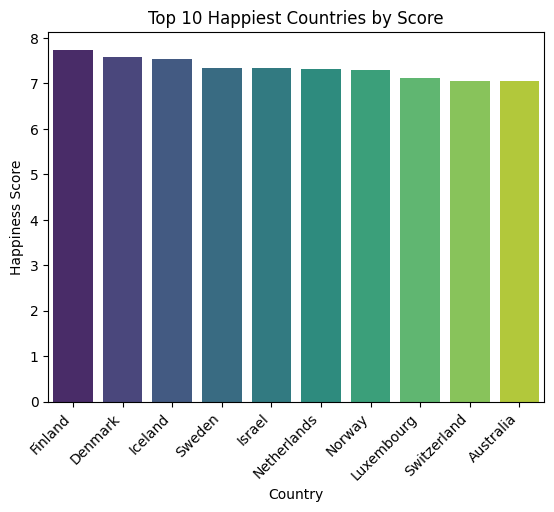

In [12]:

happiest_countries = dataset.nlargest(10, 'score')
sb.barplot(x='Country name', y='score', data=happiest_countries, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')


plt.show()


### **•	Line Plot:** Plotting the top 10 unhappiest countries by Score using a Line chart.

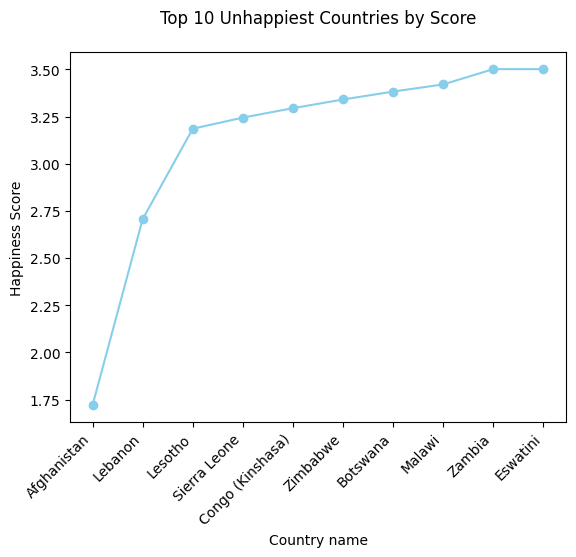

In [13]:

unhappiest_countries = dataset.nsmallest(10, 'score')
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', color='#87CEEB')
plt.title('Top 10 Unhappiest Countries by Score\n')
plt.xlabel('Country name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')

plt.show()

### **• Histogram:**	Plotting a histogram for the Score column to show its distribution and also interpret.

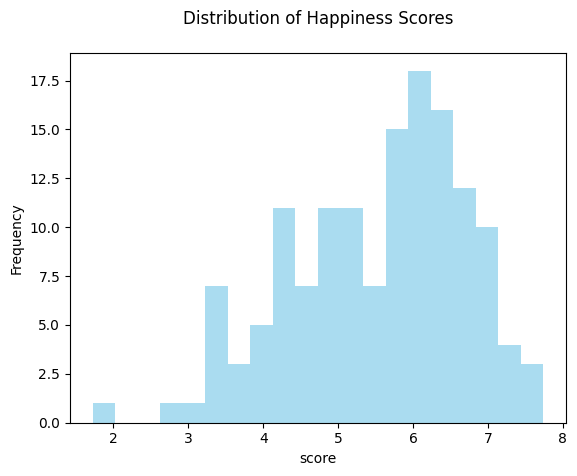

In [14]:

plt.hist(dataset['score'], bins=20, color='#87CEEB', alpha=0.7)
plt.title('Distribution of Happiness Scores\n')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

### **•	Scatter Plot:** Plotting a scatter plot between GDP per Capita and Score to visualize their relationship.

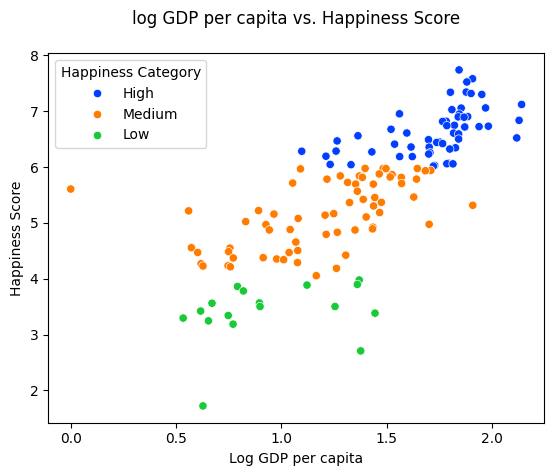

In [16]:

dataset['Happiness Category'] = dataset['score'].apply(lambda score: 'Low' if score < 4 else 'Medium' if 4 <= score <= 6 else 'High')

sb.scatterplot(x='Log GDP per capita', y='score', data=dataset, hue='Happiness Category', palette='bright')
plt.title('log GDP per capita vs. Happiness Score\n')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

## Problem-2

<font color='Blue'>Task - 1 - Setup Task - Preparing the South-Asia Dataset:</font>

### 1. Defining the countries in South Asia with a list

In [17]:

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

### 2.	Using the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [18]:
south_asia_data = dataset[dataset['Country name'].isin(south_asian_countries)]

### 3.	Saving the filtered dataframe as separate CSV files for future use.

In [19]:

south_asia_data.to_csv("South_Asia_Happiness.csv", index=False)

<font color='Blue'>Task - 2 - Composite Score Ranking: Tasks:</font>

### 1.	Using the SouthAsia DataFrame, creating a new column called Composite Score that combines the following metrics:
### **Composite Score** = 0.40×GDP per Capita+0.30×Social Support +0.30×Healthy Life Expectancy


In [20]:

south_asia_data = south_asia_data.copy()
south_asia_data.loc[:, 'Composite Score'] = (0.4 * south_asia_data['Log GDP per capita'] +
                                              0.3 * south_asia_data['Social support'] +
                                              0.3 * south_asia_data['Healthy life expectancy'])


### 2.	Ranking the South Asian countries based on the Composite Score in descending order.

In [21]:

south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asia Dataset Ranked by Composite Score:\n")
print(south_asia_data[['Country name', 'Composite Score']])


South Asia Dataset Ranked by Composite Score:

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


### 3.	Visualizing the top 5 countries using a horizontal bar chart showing the Composite Score.

<ipython-input-22-4c1b3a367193>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='Composite Score', x='Country name', data=south_asia_data.head(5), palette='bright')


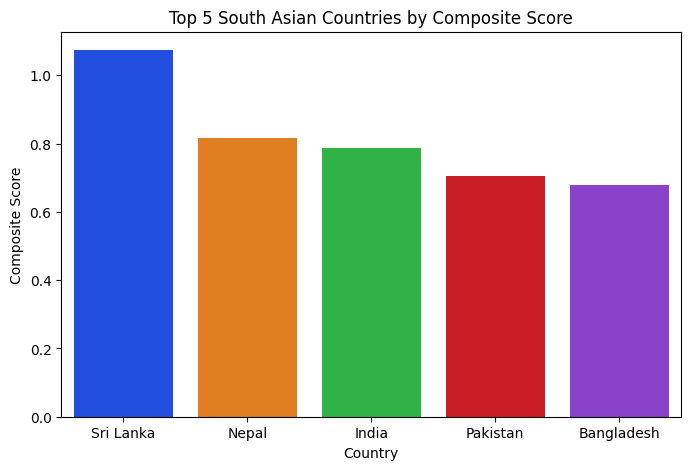

In [22]:

plt.figure(figsize=(8, 5))
sb.barplot(y='Composite Score', x='Country name', data=south_asia_data.head(5), palette='bright')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.ylabel('Composite Score')
plt.xlabel('Country')
plt.show()

<font color='Blue'>Task - 3 - Outlier Detection: Tasks:</font>

### 1.	Identifying outlier countries in South Asia based on their Score and GDP per Capita.

In [23]:

q_one = south_asia_data['score'].quantile(0.25)
q_three = south_asia_data['score'].quantile(0.75)
iqr = q_three - q_one

lower_bound = q_one - 1.5 * iqr
upper_bound = q_three + 1.5 * iqr

outliers = south_asia_data[(south_asia_data['score'] < lower_bound) | (south_asia_data['score'] > upper_bound)]
print("\nOutliers in South Asia Dataset:\n")
print(outliers[['Country name', 'score']])



Outliers in South Asia Dataset:

    Country name  score
142  Afghanistan  1.721


### 2. Define outliers using the 1.5 * IQR rule:

The IQR rule states that outliers are the values below lower boundary or above upper boundary.

Lower boundary = Q1-1.5*IOR

Upper boundary = Q3 + 1.5 * IQR

Q1 is the 25th percentile

Q3 is the 75th percentile

IQR = Q3 - Q1

### 3.	Creating a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

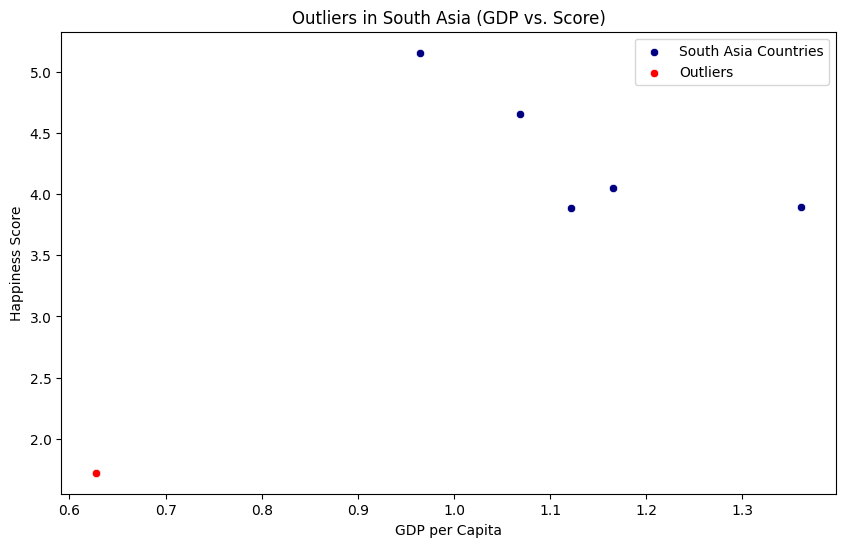

In [24]:

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='navy', label='South Asia Countries')
sb.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title('Outliers in South Asia (GDP vs. Score)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

<font color='Blue'>Task - 4 - Exploring Trends Across Metrics: Tasks:</font>

### 1.	Choosing two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [25]:
# Correlation Analysis for South Asia Dataset
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"\nCorrelation between {metric} and Happiness Score: {correlation:.2f}")


Correlation between Freedom to make life choices and Happiness Score: 0.80

Correlation between Generosity and Happiness Score: 0.87


### 2.	Creating scatter plots with trendlines for these metrics against the Score.

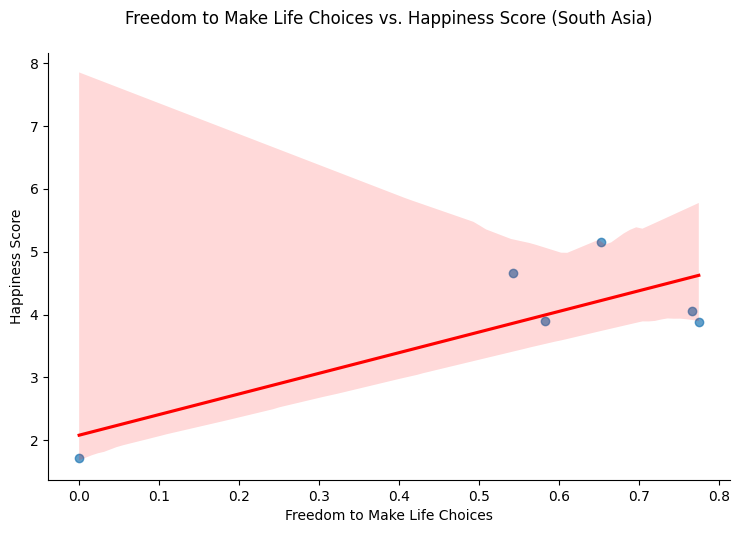

In [26]:
sb.lmplot(x='Freedom to make life choices', y='score', data=south_asia_data, aspect=1.5, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.title('Freedom to Make Life Choices vs. Happiness Score (South Asia)\n')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()


### 3.	Identifying and discussing the strongest and weakest relationships between these metrics and the Score for South Asian countries.

**Generosity (0.87):** Shows the strongest link to happiness, likely reflecting cultural emphasis on generosity in South Asia.

**Freedom to Make Life Choices (0.80):** Strongly linked to happiness but slightly less impactful than generosity, suggesting collective values may outweigh personal freedom.

<font color='Blue'>Task - 5 - Gap Analysis:</font>

### 1.	Adding a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

In [27]:

south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

### 2.	Ranking the South Asian countries by this gap in both ascending and descending order.

In [28]:

largest_positive_gap = south_asia_data.nlargest(3, 'GDP-Score Gap')
largest_negative_gap = south_asia_data.nsmallest(3, 'GDP-Score Gap')

print("\nTop 3 Countries with Largest Positive GDP-Score Gap:\n")
print(largest_positive_gap[['Country name', 'GDP-Score Gap']])

print("\nTop 3 Countries with Largest Negative GDP-Score Gap:\n")
print(largest_negative_gap[['Country name', 'GDP-Score Gap']])


Top 3 Countries with Largest Positive GDP-Score Gap:

    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Countries with Largest Negative GDP-Score Gap:

    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


### 3.	Highlighting the top 3 countries with the largest positive and negative gaps using a bar chart.

<ipython-input-29-78fdcfb706eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Country name', y='GDP-Score Gap', data=pd.concat([largest_positive_gap, largest_negative_gap]), palette='bright')


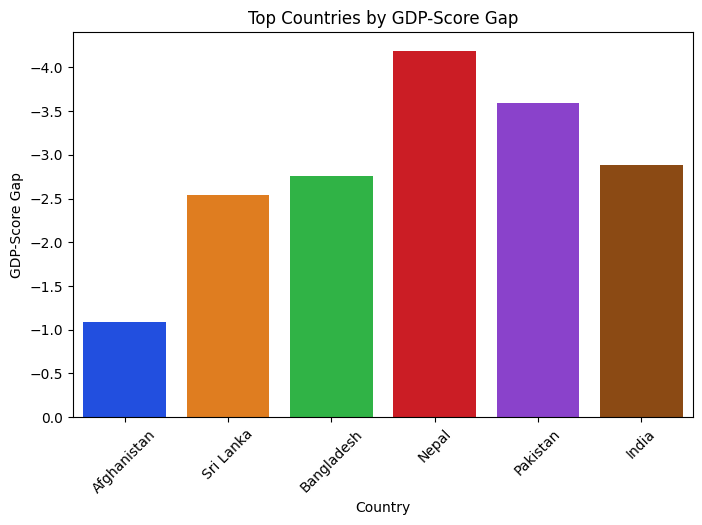

In [29]:

plt.figure(figsize=(8, 5))
sb.barplot(x='Country name', y='GDP-Score Gap', data=pd.concat([largest_positive_gap, largest_negative_gap]), palette='bright')
plt.title('Top Countries by GDP-Score Gap')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better visibility
plt.gca().invert_yaxis()  # Inverting the y-axis to show positive values at the bottom
plt.show()


### 4.	Analyzing the reasons behind these gaps and their implications for South Asian countries.

**Reasons for Positive GDP-Score Gap:**

Countries like Nepal and Sri Lanka have higher GDP per capita compared to their Happiness Scores which may caused from income inequality or poor use of wealth to improve basic services like healthcare and education.

**Reasons for Negative GDP-Score Gap:**

Countries like Pakistan and Afghanistan have higher Happiness Scores than GDP per capita which could be due to strong social bonds, cultural values, or community support that help maintain happiness despite low income levels.

**Implications:**

•**For Positive Gaps:** Focus on fair wealth distribution and improving healthcare, education, and public services for economic progress with happiness.

•	**For Negative Gaps:** Strengthen economic conditions while preserving cultural and social strengths to further increase happiness.


## Problem-3 - Comparative Analysis:

<font color='Blue'>Task - 1 - Setup Task - Preparing the Middle Eastern Dataset: Tasks:</font>

### Similarly as in **Task - 1** of **Problem 2** creating a dataframe from middle eastern countries.

In [31]:

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = dataset[dataset['Country name'].isin(middle_east_countries)]

## 1.	Descriptive Statistics:

### •	Calculating the mean, Standard deviation of the score for both South Asia and Middle East.


In [32]:
south_asia_mean = south_asia_data['score'].mean()
middle_east_mean = middle_east_data['score'].mean()

south_asia_std = south_asia_data['score'].std()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia:- \nMean Happiness Score: {south_asia_mean:.2f},\nStd Dev: {south_asia_std:.2f}")
print(f"\nMiddle East:- \nMean Happiness Score: {middle_east_mean:.2f},\nStd Dev: {middle_east_std:.2f}")

South Asia:- 
Mean Happiness Score: 3.90,
Std Dev: 1.18

Middle East:- 
Mean Happiness Score: 5.41,
Std Dev: 1.57


### •	Which region has higher happiness Scores on average?


In [33]:
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has higher average happiness scores.")
else:
    print("\nMiddle East has higher average happiness scores.")


Middle East has higher average happiness scores.


## 2.	Top and Bottom Performers:

### •	Identifying the top 3 and bottom 3 countries in each region based on the score.

In [34]:
south_asia_top_3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom_3 = south_asia_data.nsmallest(3, 'score')

middle_east_top_3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_data.nsmallest(3, 'score')

print("\nSouth Asia - Top 3 Countries:\n")
print(south_asia_top_3[['Country name', 'score']])

print("\nSouth Asia - Bottom 3 Countries:\n")
print(south_asia_bottom_3[['Country name', 'score']])

print("\nMiddle East - Top 3 Countries:\n")
print(middle_east_top_3[['Country name', 'score']])

print("\nMiddle East - Bottom 3 Countries:\n")
print(middle_east_bottom_3[['Country name', 'score']])



South Asia - Top 3 Countries:

    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

South Asia - Bottom 3 Countries:

    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Middle East - Top 3 Countries:

            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Middle East - Bottom 3 Countries:

    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


### •	Plotting bar charts comparing these charts.

<ipython-input-35-928b3692b505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='score', x='Country name', data=pd.concat([south_asia_top_3, south_asia_bottom_3]), palette='coolwarm')
<ipython-input-35-928b3692b505>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='score', x='Country name', data=pd.concat([middle_east_top_3, middle_east_bottom_3]), palette='coolwarm')


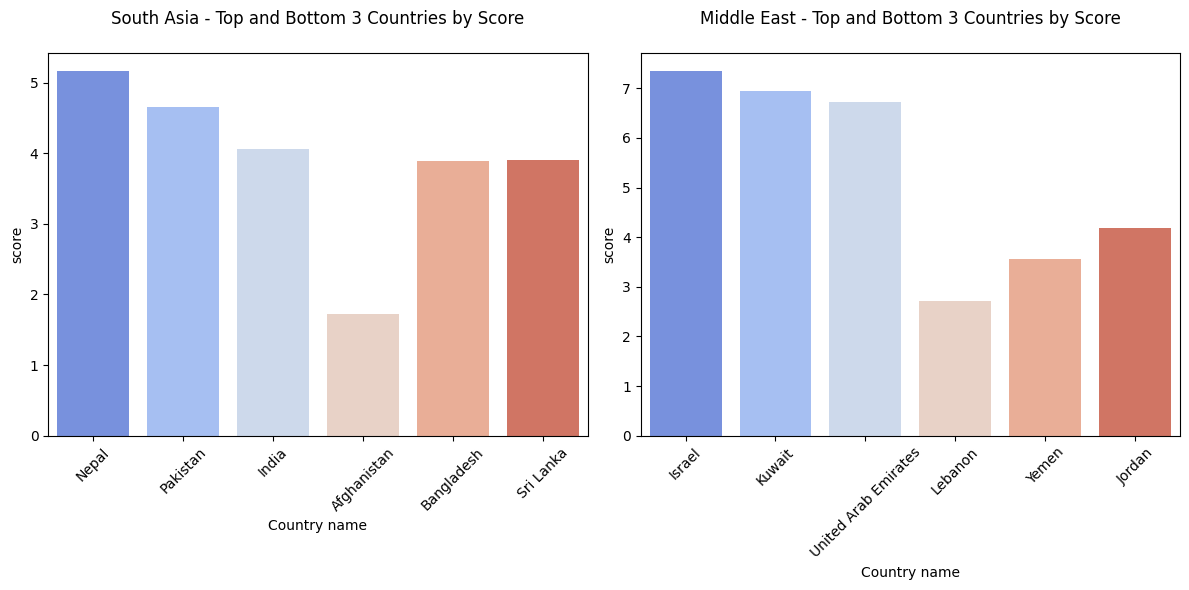

In [35]:
# Plotting bar charts comparing top and bottom performers
plt.figure(figsize=(12, 6))

# South Asia
plt.subplot(1, 2, 1)
sb.barplot(y='score', x='Country name', data=pd.concat([south_asia_top_3, south_asia_bottom_3]), palette='coolwarm')
plt.xticks(rotation=45)
plt.title('South Asia - Top and Bottom 3 Countries by Score\n')

# Middle East
plt.subplot(1, 2, 2)
sb.barplot(y='score', x='Country name', data=pd.concat([middle_east_top_3, middle_east_bottom_3]), palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Middle East - Top and Bottom 3 Countries by Score\n')

plt.tight_layout()
plt.show()

3.	Metric Comparisons:


### •	Comparing key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.


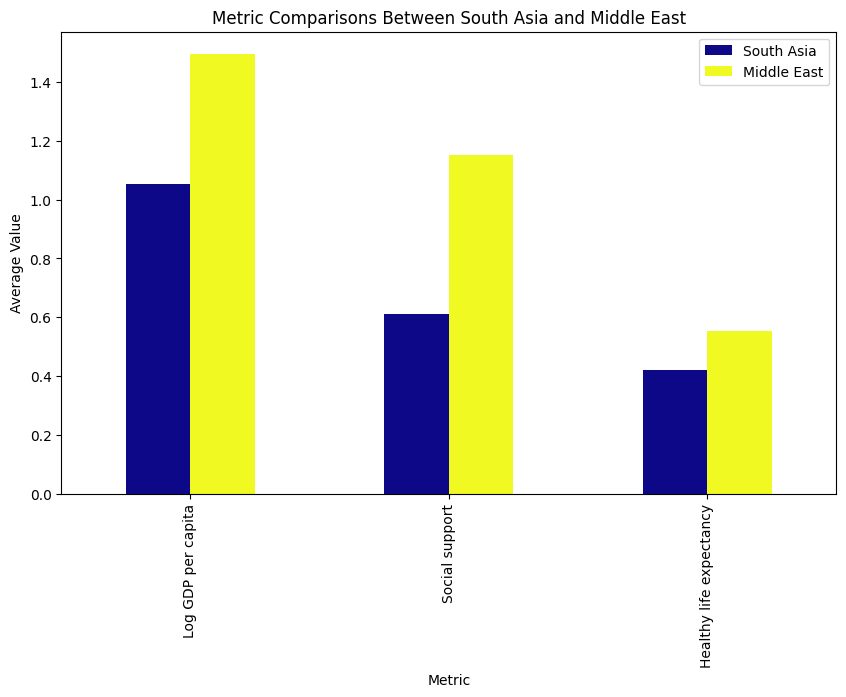

In [37]:
# List of metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Creationg a DataFrame for the metric comparisons
metric_comparison = pd.DataFrame({
    'Metric': metrics,
    'South Asia': [south_asia_data[m].mean() for m in metrics],
    'Middle East': [middle_east_data[m].mean() for m in metrics]
})

# Setting the 'Metric' column as the index and plot the grouped bar chart
metric_comparison.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Metric Comparisons Between South Asia and Middle East')
plt.ylabel('Average Value')
plt.show()


### •	Which metrics show the largest disparity between the two regions?

Ans: **Social Support** shows the largest disparity between the two regions.


## 4.	Happiness Disparity:


### •	Computing the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [39]:

south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"\nSouth Asia:- \nScore Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"\nMiddle East:- \nScore Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")



South Asia:- 
Score Range: 3.44, CV: 0.30

Middle East:- 
Score Range: 4.63, CV: 0.29



### •	Which region has greater variability in happiness?


In [40]:
# Identifying which region has greater variability in happiness
if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nMiddle East has greater variability in happiness scores.")


South Asia has greater variability in happiness scores.


## 5.	Correlation Analysis:


### •	Analyzing the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


### •	Creating scatter plots to visualize and interpreting the relationships.


South Asia - Correlation between Freedom to make life choices and Score: 0.80


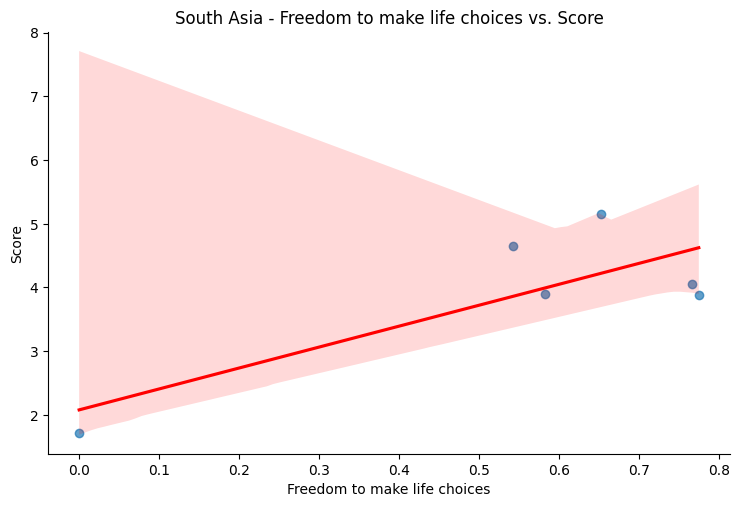

South Asia - Correlation between Generosity and Score: 0.87


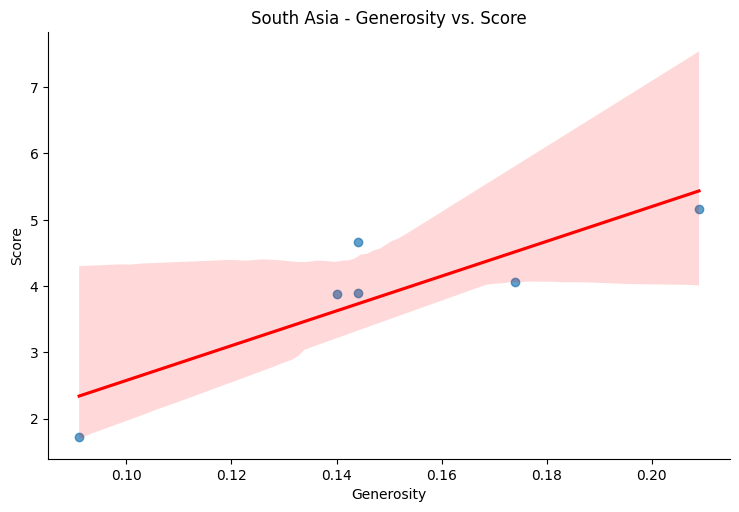

Middle East - Correlation between Freedom to make life choices and Score: 0.86


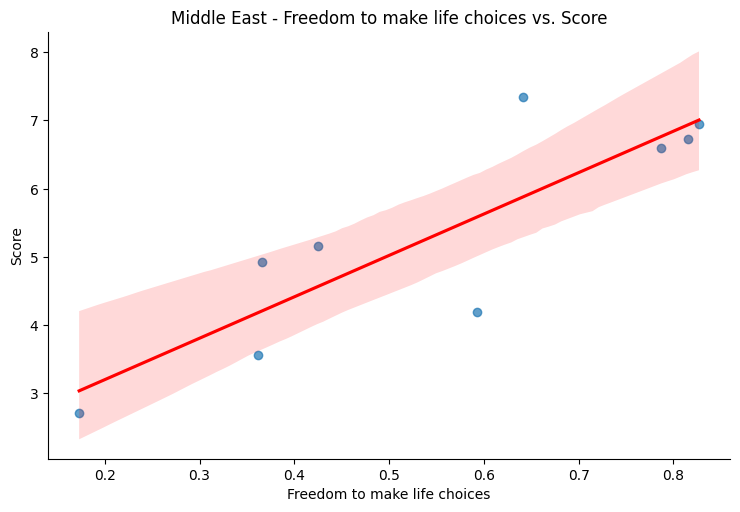

Middle East - Correlation between Generosity and Score: 0.63


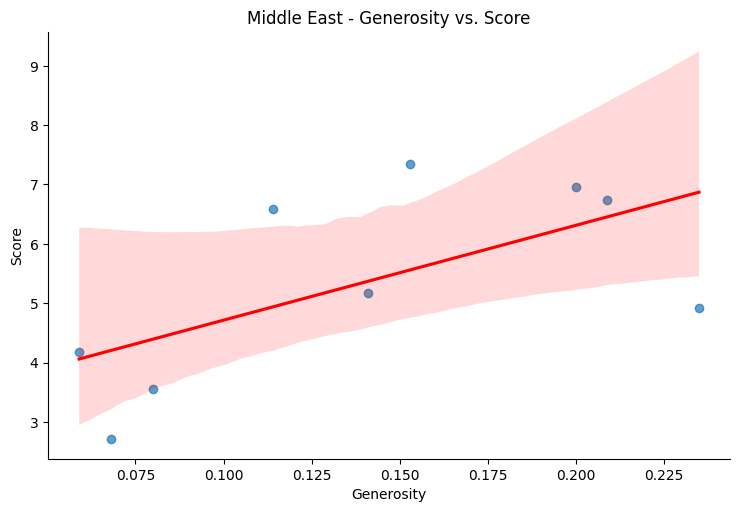

In [41]:
# Correlation of Score with other metrics for each region
metrics_for_correlation = ['Freedom to make life choices', 'Generosity']

# South Asia Correlations
for metric in metrics_for_correlation:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"South Asia - Correlation between {metric} and Score: {correlation:.2f}")

    # Scatter plot with trendline
    sb.lmplot(x=metric, y='score', data=south_asia_data, aspect=1.5, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
    plt.title(f'South Asia - {metric} vs. Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

# Middle East Correlations
for metric in metrics_for_correlation:
    correlation = middle_east_data[metric].corr(middle_east_data['score'])
    print(f"Middle East - Correlation between {metric} and Score: {correlation:.2f}")

    # Scatter plot with trendline
    sb.lmplot(x=metric, y='score', data=middle_east_data, aspect=1.5, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
    plt.title(f'Middle East - {metric} vs. Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()



## 6.	Outlier Detection:



### •	Identifying outlier countries in both regions based on Score and GDP per Capita.


In [43]:

south_asia_outliers = south_asia_data[(south_asia_data['score'] < south_asia_data['score'].quantile(0.25) - 1.5 * (south_asia_data['score'].quantile(0.75) - south_asia_data['score'].quantile(0.25))) |
                                      (south_asia_data['score'] > south_asia_data['score'].quantile(0.75) + 1.5 * (south_asia_data['score'].quantile(0.75) - south_asia_data['score'].quantile(0.25)))]

middle_east_outliers = middle_east_data[(middle_east_data['score'] < middle_east_data['score'].quantile(0.25) - 1.5 * (middle_east_data['score'].quantile(0.75) - middle_east_data['score'].quantile(0.25))) |
                                        (middle_east_data['score'] > middle_east_data['score'].quantile(0.75) + 1.5 * (middle_east_data['score'].quantile(0.75) - middle_east_data['score'].quantile(0.25)))]

### •	Plotting these outliers and discussing their implications.

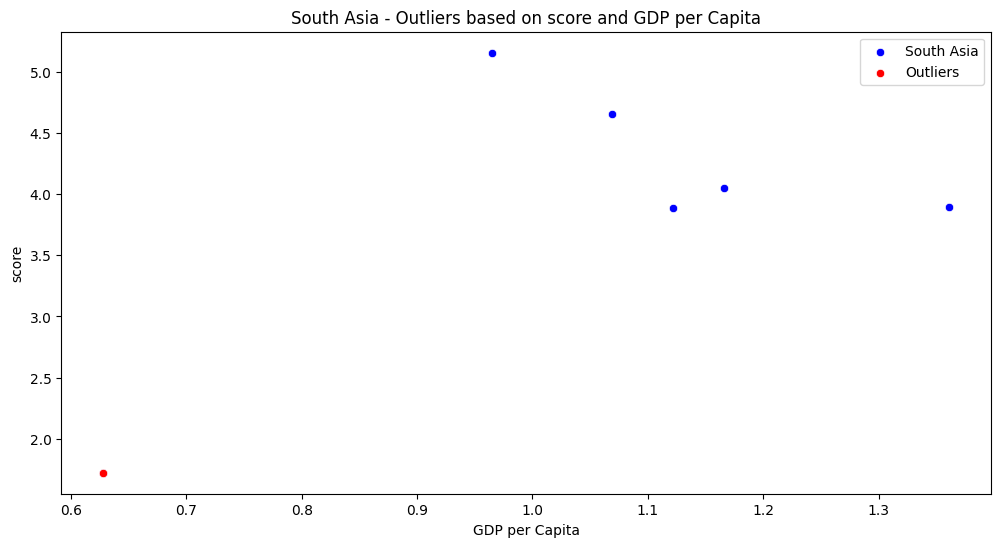

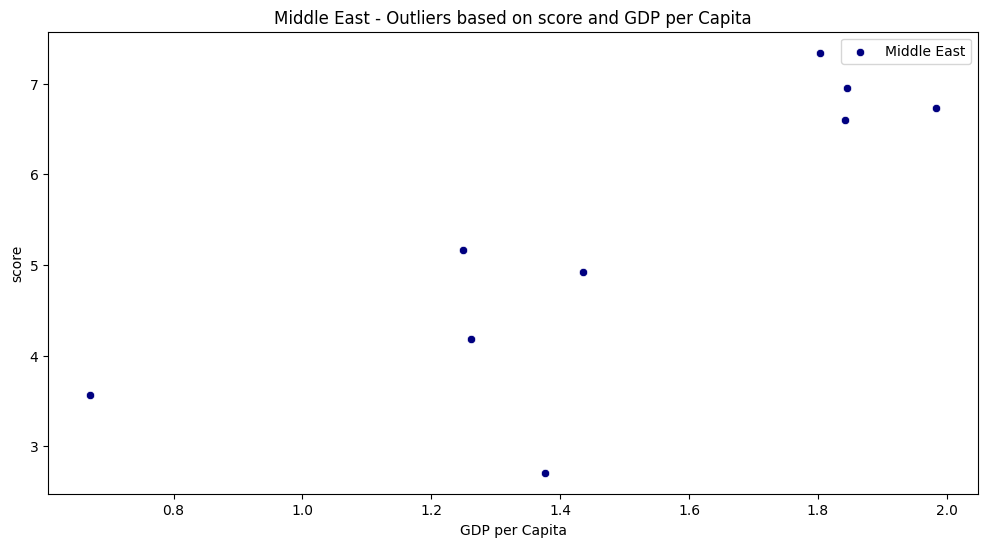

In [46]:

plt.figure(figsize=(12, 6))

# South Asia
sb.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='South Asia', color='blue')
sb.scatterplot(x='Log GDP per capita', y='score', data=south_asia_outliers, label='Outliers', color='red')
plt.title('South Asia - Outliers based on score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('score')
plt.legend()
plt.show()

# Middle East
plt.figure(figsize=(12, 6))
sb.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Middle East', color='navy')
sb.scatterplot(x='Log GDP per capita', y='score', data=middle_east_outliers, label='Outliers', color='red')
plt.title('Middle East - Outliers based on score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('score')
plt.legend()
plt.show()

**Implications:**

-South Asia should focus on helping the outlier country catch up.

-The Middle East needs policies tailored to its diverse economic conditions.

## 7.	Visualization:




### •	Create boxplots comparing the distribution of Score between South Asia and the Middle East.

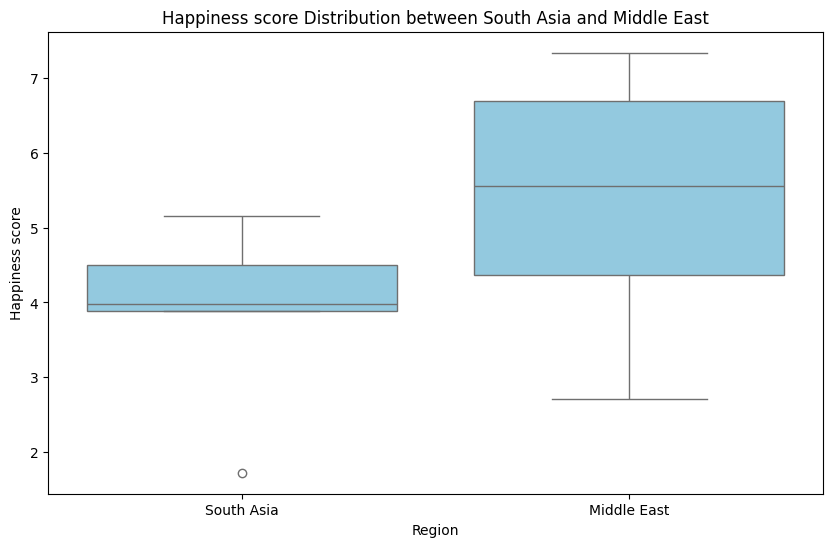

In [47]:
# Boxplot comparing score distribution between South Asia and Middle East
plt.figure(figsize=(10, 6))
sb.boxplot(x='Region', y='score', data=pd.concat([south_asia_data.assign(Region='South Asia'), middle_east_data.assign(Region='Middle East')]), color='#87CEEB')
plt.title('Happiness score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness score')
plt.show()

### •	Interpreting the key differences in distribution shapes, medians, and outliers.

The boxplot reveals that the Middle East has a higher median happiness score (around 6) compared to South Asia (around 4.5). The Middle East also shows a greater variability in scores, as indicated by its larger interquartile range (IQR) and wider whiskers. However, South Asia's scores are more consistent, with a smaller IQR and range. An outlier is present in South Asia, indicating one country with a lower happiness score, while the Middle East has no outliers. Overall, the Middle East demonstrates higher and more varied happiness levels than South Asia.